In [105]:
%matplotlib notebook
%matplotlib inline
import pandas as df
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift

In [106]:
# All Data is based on Official released by WHO gathered by Johns Hopkins
coronaData = df.read_csv("corona.csv")
# Well this data wasn't maintained lol

In [107]:
# The point of this analysis is to take a stats approach to the Coronavirus
coronaData

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,105586.0,109577.0,113702.0,118319.0,125260.0,132758.0,142534.0,153517.0,167515.0,179111.0
1,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,80859.0,80904.0,80924.0,80955.0,80981.0,80991.0,81021.0,81048.0,81077.0,81116.0
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Henan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Zhejiang,China,Western Pacific Region,NaN,5.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hunan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Anhui,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# We see there are lots of NaNs but by logic, they are most likely 0s so let's change them
coronaData = coronaData.fillna(0)
# Now let's also remove the labels
coronaData = coronaData.drop(columns=["Province/States","Country/Region","WHO region"])

In [109]:
# Get first row
globalData = coronaData.iloc[0]

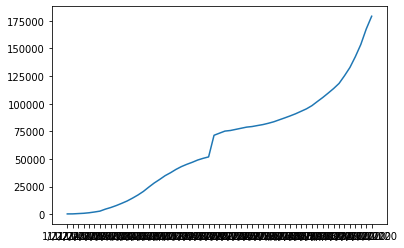

In [110]:
#Plot it
plt.plot(globalData)

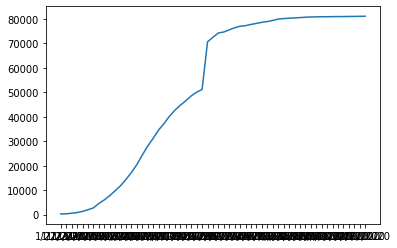

In [112]:
# Now let's check out china only
chinaData = coronaData.iloc[1]
plt.plot(chinaData)

In [113]:
globalData.corr(chinaData)

0.9068441503532033

In [114]:
coronaData.iloc[0].corr(coronaData.iloc[1])

0.9068441503532033

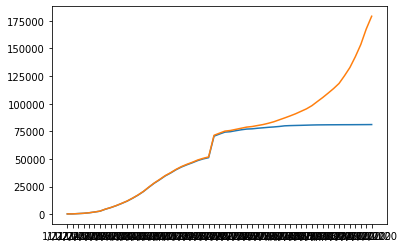

In [115]:
plt.plot(chinaData)
plt.plot(globalData)

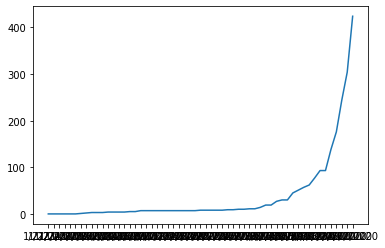

In [116]:
# For Canada
plt.plot(coronaData.iloc[49])